In [17]:
import sys
import os


def check_path_exists(Path,Message):
    if not os.path.exists(Path):
        print(Message)
        sys.exit(1)
# Cette partie permet d'ajouter le dossier parent au path, pour pouvoir importer les modules que nous avons créés. ça peut être soit un chemin
# absolu, soit un chemin relatif. Ici, c'est un chemin absolu.
Path_Modules = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Modules"
Path_Models = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Models"
check_path_exists(Path_Modules,"Le chemin spécifié pour importer les modules n'existe pas. Il faut surement le modifier.")


sys.path.append(Path_Modules)
sys.path.append(Path_Models)

# Importer les module
from Preprocessing import *
from Resnet import *
from Test import *


In [18]:
resize=True
size=(224,224)
normalize=True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder_test_images_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Donnees_Test"

# Checker si le dossier existe
check_path_exists(folder_test_images_path,"Le chemin spécifié pour les images n'existe pas. Il faut surement le modifier.")


# Renommer les images
rename_images_in_folder(folder_test_images_path)


Renommé : 0UKZ4YZsnIKGB2.png -> img_1.png
Renommé : 0phiaVTe0aEYQp.png -> img_2.png
Renommé : 0zh4WVMemTkZuhUbx.png -> img_3.png
Renommé : 2Bfpkqe7zymT5J.png -> img_4.png
Renommé : 3HOiFVCOPSjmbxket.png -> img_5.png
Renommé : 3e1Cll6TEiQWKb0Ij.png -> img_6.png
Renommé : 4IySjMfPciFVEF.png -> img_7.png
Renommé : 4rcNpvUDFm7Ovr9I9.png -> img_8.png
Renommé : 4zP9JXkxdT.png -> img_9.png
Renommé : 7lTZdVnSb4F.png -> img_10.png
Renommé : 7ouAIRVXys4YJv.png -> img_11.png
Renommé : 8AUPhPHRMQRoiVIE4t.png -> img_12.png
Renommé : 8gCEUBvaXFLtyKslSeU.png -> img_13.png
Renommé : 9XncKXGPydXRI2SwG.png -> img_14.png
Renommé : 9jwnwEDv4po0nmz0.png -> img_15.png
Renommé : 12n9Sa7rcsC.png -> img_16.png
Renommé : 41ANOgqUeOkA7.png -> img_17.png
Renommé : 77HCuic6YvQ.png -> img_18.png
Renommé : 99S9sM2T2d9Xd.png -> img_19.png
Renommé : 6161os7gb5CwRtq.png -> img_20.png
Renommé : B6BE6ECJ5KSIPMr.png -> img_21.png
Renommé : BV1RiB7GMrPzJWUkQBc.png -> img_22.png
Renommé : CXvVh6LkpMOxXW0Nq.png -> img_23.png

# Importation des images

In [19]:
# Créer le DataFrame
Images_Original,Images = import_images_nparrays_test(folder_test_images_path, resize=True, size=(224,224), normalize=True)



Images = torch.tensor(Images, dtype=torch.float32)

Images = Images.to(device)

Frac_Images_To_Import = 1





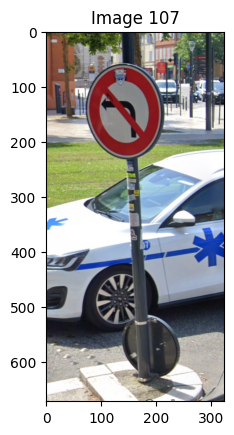

In [20]:
# Afficher les images


import matplotlib.pyplot as plt
import numpy as np
# Plot the first image
nb = np.random.randint(0,Images.shape[0],1)[0]
Image_To_Plot = Images_Original[nb]

Image_To_Plot= np.transpose(Image_To_Plot, (0, 1, 2))
plt.imshow(Image_To_Plot)
plt.title(f"Image {nb}")
plt.show()

# Importation des modèles

In [21]:


model_type_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Types.pth"

model_Dangers_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Dangers.pth"

model_Fin_Interdictions_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Fin_Interdictions.pth"

model_Obligations_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Obligations.pth"

model_Indications_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Indications.pth"

model_Interdictions_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Interdictions.pth"


# Gather models in Dict

models_paths = {
    "Types": model_type_path,
    "Dangers": model_Dangers_path,
    "Fin_Interdictions": model_Fin_Interdictions_path,
    "Obligations": model_Obligations_path,
    "Indications": model_Indications_path,
    "Interdictions": model_Interdictions_path
}


In [7]:
dict_paths = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Encoding_Dictionaries/"


In [22]:
def test_image(image,folder_models_path,dict_paths):

    def load_model(path):

        model = torch.load(path)

        return model
    

    def predict_image(model,image):
        
        model.eval()
        with torch.no_grad():
            image = image.unsqueeze(0)
            print(image.shape)
            image = image.permute(0,3,1,2)
            output = model(image)
            _, predicted = torch.max(output, 1)
            predicted = predicted.item()
            
        return predicted
    

    def load_pannel_dict(path,title_label_to_int,title_int_to_label):
        
        def check_path_exists(path,message):
            if not os.path.exists(path):
                raise ValueError(message)
            else:
                pass

        check_path_exists(path,"The specified path for the encoding dictionaries does not exist. You probably need to modify it : "+path)

        # Load JSON into dictionaries
        with open(path+title_label_to_int+".json", "r") as read_file:
            label_to_int = json.load(read_file)

        with open(path+title_int_to_label+".json", "r") as read_file:
            int_to_label = json.load(read_file)

        return label_to_int,int_to_label



    type_to_int, int_to_type = load_pannel_dict(dict_paths+"Types/","types_to_int","int_to_types")
    # Importing the model that will predict the type pannel
    type_pannel_model_path = folder_models_path['Types']
    # Importing the image
    ## Load the image


    type_pannel_model = load_model(type_pannel_model_path)

    



    # Predicting the type pannel

    type_pannel_encoded_predict = predict_image(type_pannel_model,image)

    
    type_pannel = int_to_type[str(type_pannel_encoded_predict)]

    print(f"Type pannel: {type_pannel}")

    # Load Corresponding type dict
    label_to_int,int_to_label = load_pannel_dict(dict_paths+type_pannel+"/","labels_to_int","int_to_labels")





    # Getting the model that will predict the label
    model_label_path = folder_models_path[type_pannel]

    # Importing the model that will predict the label
    label_model = load_model(model_label_path)

    # Predicting the label
    label_encoded = predict_image(label_model,image)


    label = int_to_label[str(label_encoded)]

    print(f"Type pannel: {type_pannel} - Label: {label}")
    return type_pannel,label




In [9]:
# Test the first image


test_image(Images[112],models_paths,dict_paths)






torch.Size([1, 224, 224, 3])
Type pannel: Interdictions
torch.Size([1, 224, 224, 3])
Type pannel: Interdictions - Label: Interdictions-signaux_sonores_interdits


('Interdictions', 'Interdictions-signaux_sonores_interdits')

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Indications - Label: Indications-Entree_Aire_Pietonne


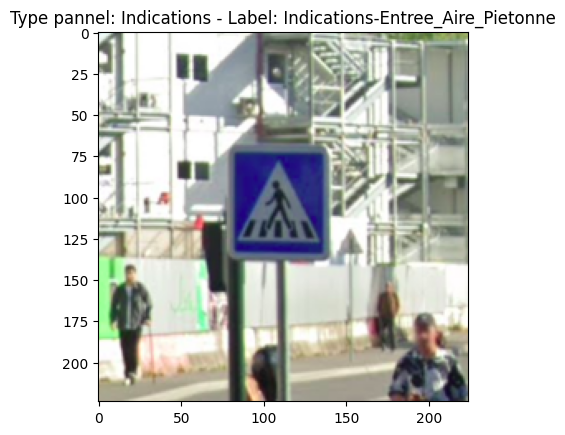

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Interdictions - Label: Interdictions-sens_interdit


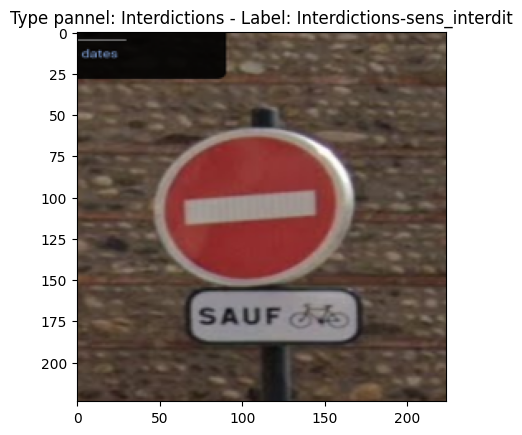

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Dangers - Label: Dangers-Succesion_De_Virage_Droite


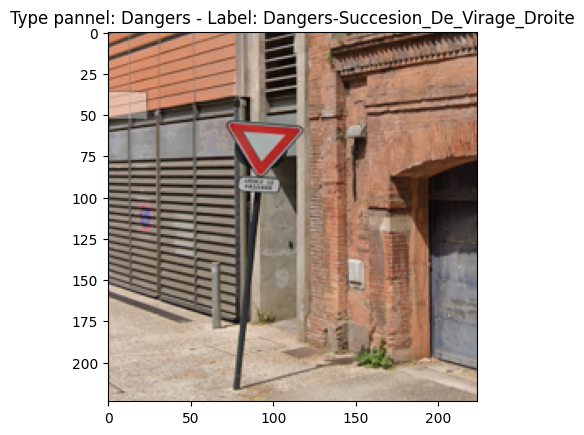

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Interdictions - Label: Interdictions-limitation_vitesse


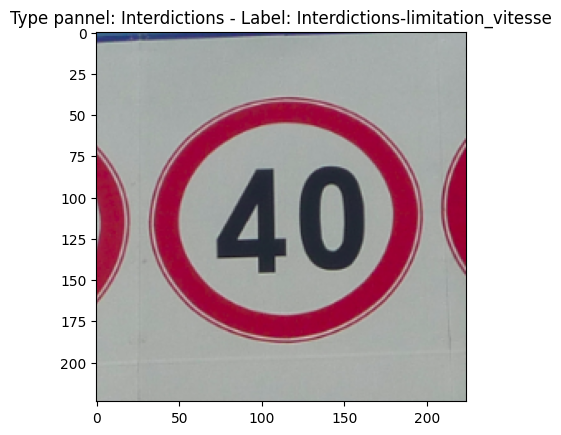

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Interdictions - Label: Interdictions-signaux_sonores_interdits


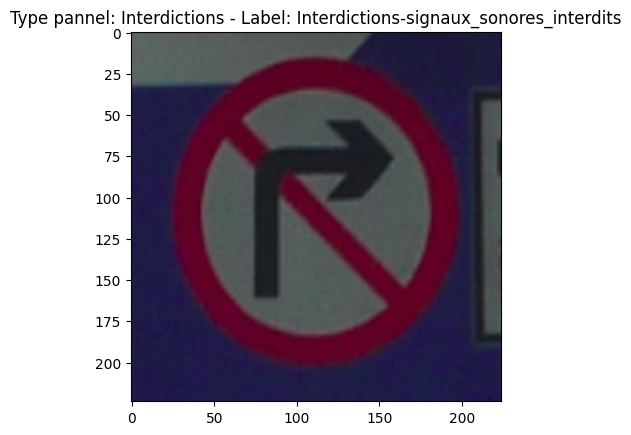

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Obligations - Label: Obligations-tourner_a_droite


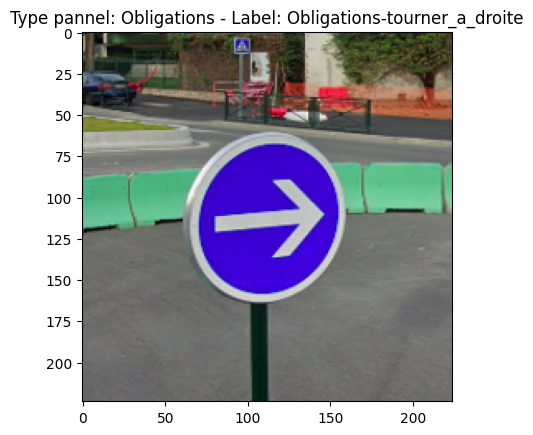

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Indications - Label: Indications-Passage_Pour_Pietons


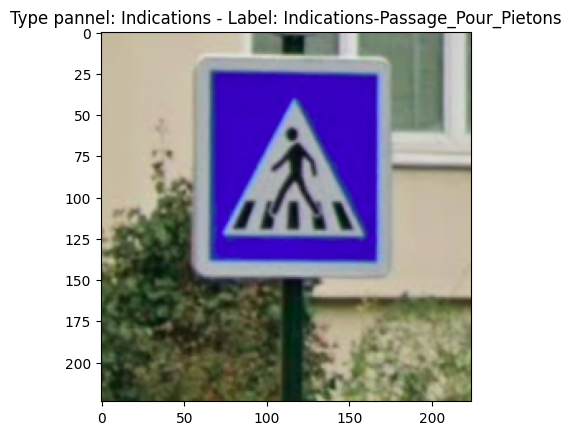

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Interdictions - Label: Interdictions-interdiction_tourner_gauche


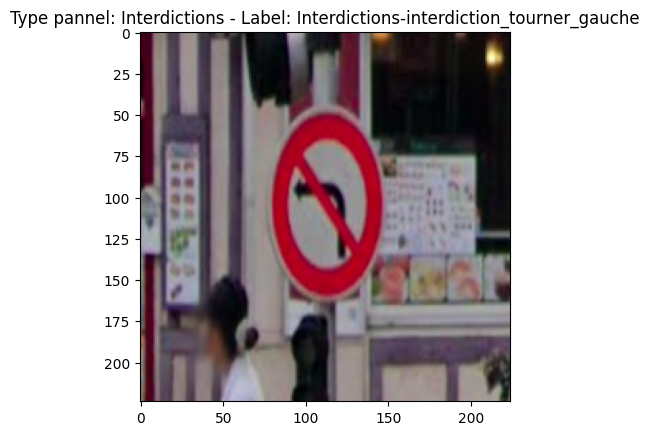

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Obligations - Label: Obligations-tourner_a_droite


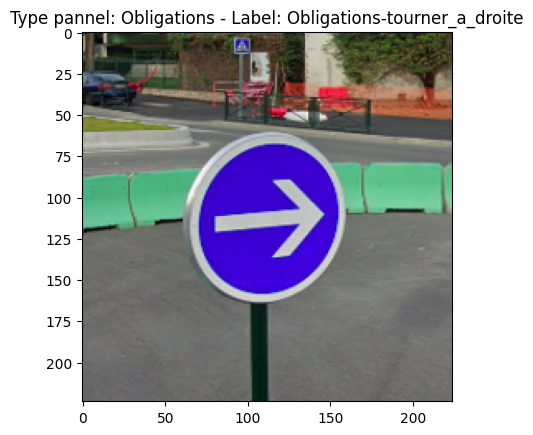

torch.Size([1, 224, 224, 3])
torch.Size([1, 224, 224, 3])
Type pannel: Fin_Interdictions - Label: Fin_Interdictions-Fin_Interdiction_De_Depasser


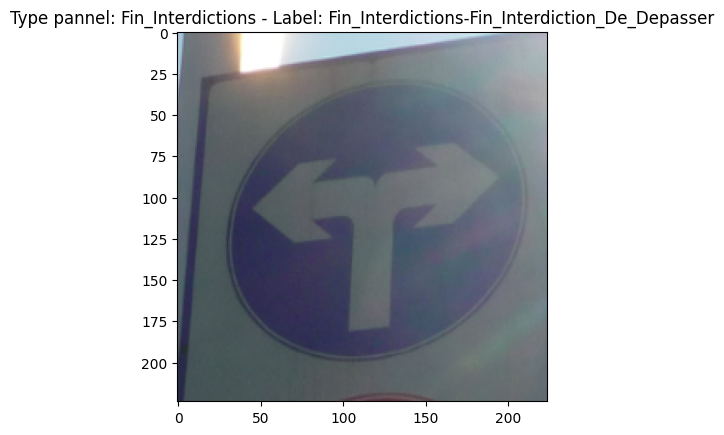

In [24]:
test_images(10,Images,models_paths,dict_paths)